<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/Multiple_Linear_Regression_Fuel_Consumption_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install pandas_profiling --upgrade

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(1067, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**Bivariate Analysis**

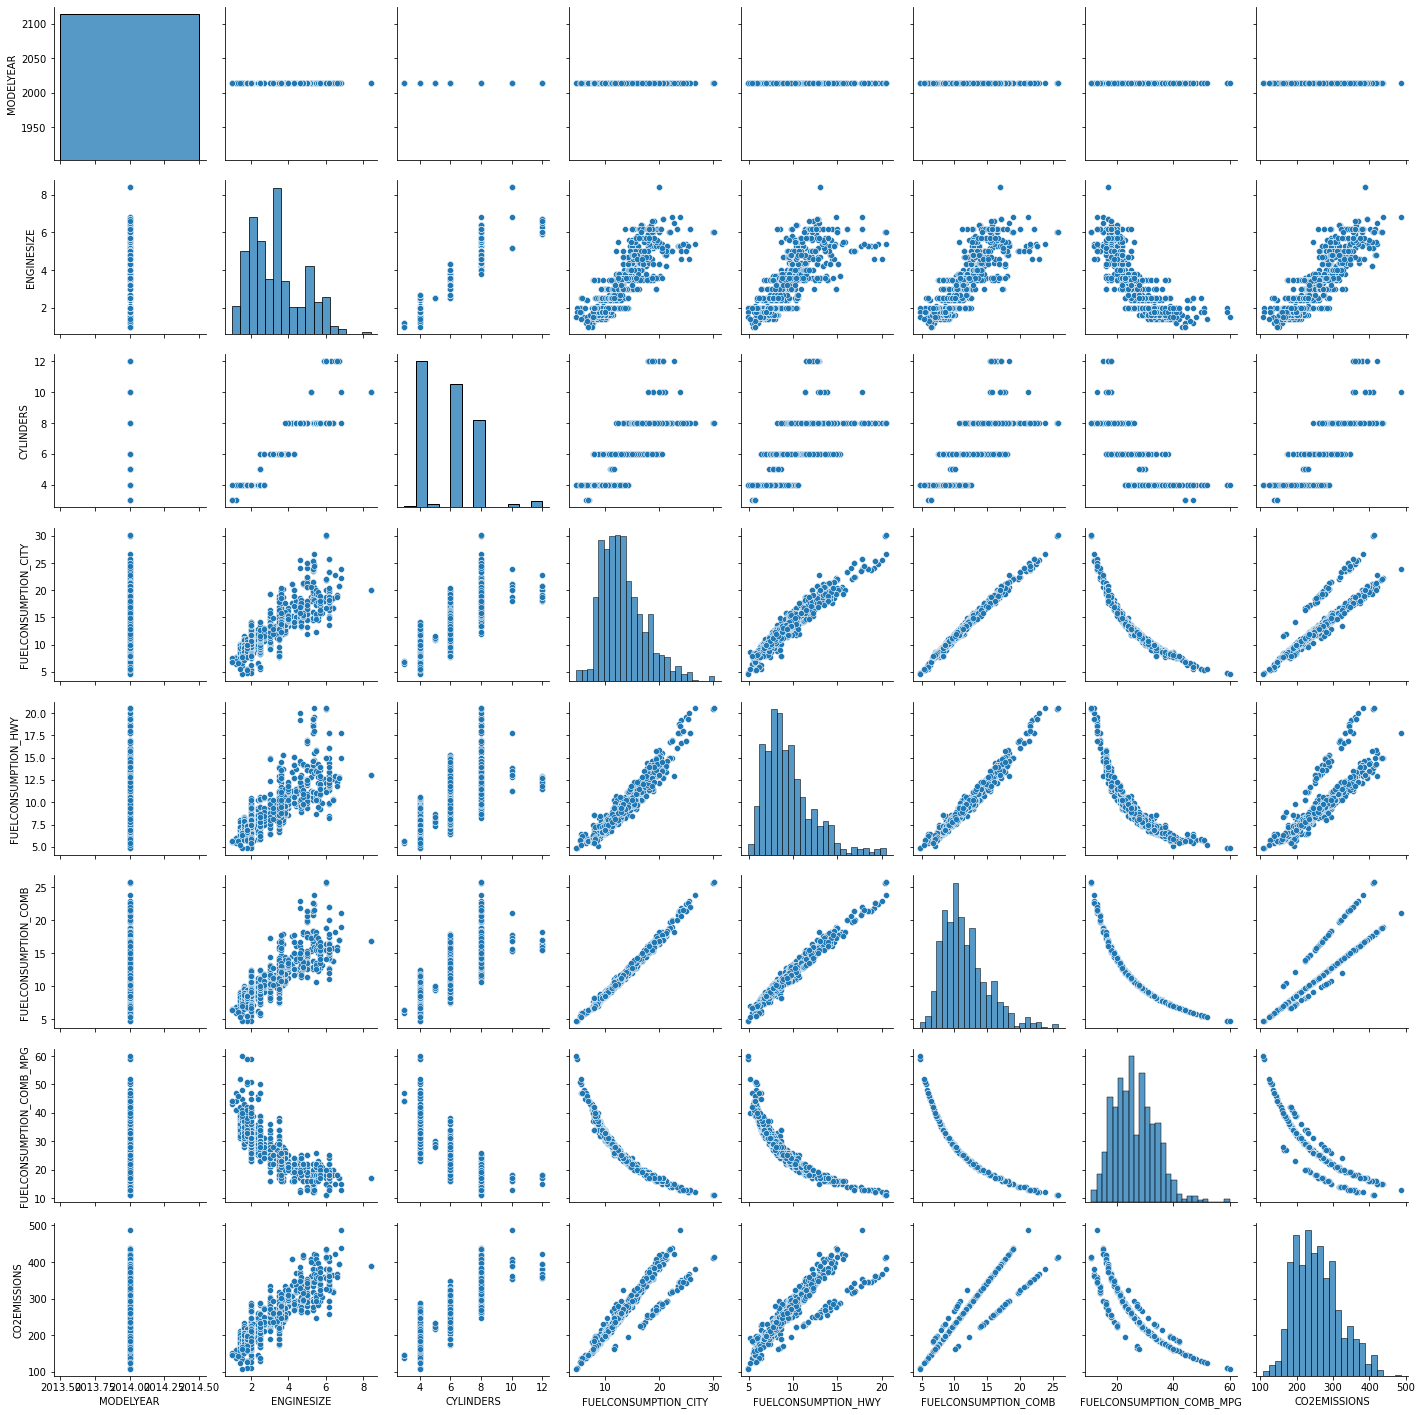

In [8]:
sns.pairplot(df)

We can remove model year colum, since it is constant :2014



In [18]:
from pandas_profiling import ProfileReport

In [ ]:
!pip install pandas_profiling

In [ ]:
ProfileReport(df) #need to check

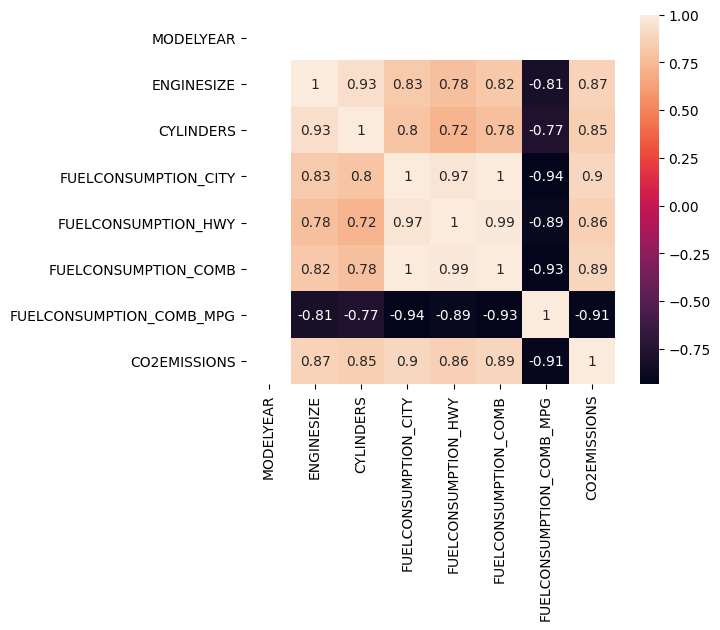

In [30]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', square=True)

In [32]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [81]:
Features=['ENGINESIZE', 'CYLINDERS',
       # 'FUELCONSUMPTION_CITY',
       #'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']

#'TRANSMISSION', 'FUELTYPE'

In [82]:
X=df[Features]

In [83]:
y=df['CO2EMISSIONS']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [84]:
## Train The Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
lr=LinearRegression()

In [86]:
#Fit the model
lr.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#Slope of regression line
lr.coef_

array([11.51750586,  5.73893427, -4.90584449])

In [88]:
#intercept of regression line
lr.intercept_


314.56693036176085

In [89]:
df.head(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [90]:
#lr.predict([[2.0,4,9.9,6.7,8.5,33]])
lr.predict([[2.0,4,33]])

array([198.66481101])

In [91]:
y_pred=lr.predict(X_test)

In [92]:
#Check for errors
print("mse: ",metrics.mean_squared_error(y_test, y_pred))
print("rmse: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#taking all features
#mse:  429.5419812230428
#rmse:  20.725394597523174

mse:  454.3253273026615
rmse:  21.31490856894914


In [111]:
#Rscore
Train_score=lr.score(X_train, y_train)
print("Training score: {}".format(Train_score))


type(y_test)
#.reshape(-1,1)

Test_score=metrics.r2_score(y_test, y_pred)
#lr.score()
print("Test score: {}".format(Test_score))


#taking all features
#Training score: 0.886358500186745
#Test score: 0.8945203026294813

Training score: 0.8813104385134813
Test score: 0.8884344252098546


In [ ]:
#check for adjusted R2 for feature selection

#Summary:

1. EDA
2. Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)
3. Model Selection for Train and Testing porcess Spliting the Data in to 75% 
4. For Train and 25% Testing
5. Apply the linear Regression Model
6. Fit the Model
7. New_predication
8. Comparing the Actual Data and New predication and find the Error
9. Find the Train Score and Test Score
10. Final Find the Overall Error in the data



# New Section